## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

# **Loading data and importing packages**

In [ ]:
# importing the required packages
import pandas as pd
import numpy as np
# importing visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# insert the data file
path = '/content/drive/MyDrive/Telecom Churn.csv'

In [ ]:
# providing the path
telecom_df = pd.read_csv(path)

In [ ]:
# Creating the dataset
telecom_df = pd.DataFrame(telecom_df)

# **More understanding of the data**

In [ ]:
# view of top 5 rows of the data
telecom_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# view of bottom 5 rows of the data
telecom_df.tail(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
# knowing the rows and columns of the data
telecom_df.shape

(3333, 20)

In [ ]:
# getting the list of columns
list(telecom_df.columns)

['State',
 'Account length',
 'Area code',
 'International plan',
 'Voice mail plan',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
 'Churn']

# **Description of columns**

*   State- state to which customers belong
*   Account length- the number of days for which customer has used the service
*   Area code- the specific areas to which customers belong
*   International plan- whether the customer has international plan or not
*   Voice mail plan- customers having voice mail plan
*   Number vmail messages- total number of vmail messages send by customer
*   Total day minutes- total call minutes during daytime
*   Total day calls- total calls during day time
*   Total day charge- total charge for calls during day time
*   Total eve minutes- total call minutes during evening time
*   Total eve calls- total calls during evening time
*   Total eve charge- total charge for calls during evening time
*   Total night minutes- total call minutes during night time
*   Total night calls- total call minutes during night time
*   Total night charge- total charge for calls during night time
*   Total intl minutes- total international call minutes
*   Total intl calls- total international calls
*   Total intl charge- total international charge for international calls
*   Customer service calls- number of customer service calls
*   Churn- whether a customer has continued or cancelled the subscription















In [ ]:
# finding the data types of the columns
telecom_df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [ ]:
# details of the dataset
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

**# Here we have seen that all 3333 entries are present and there is no null values.**



In [ ]:
telecom_df.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

# **Description of dataset to find insights from the data**

In [ ]:
telecom_df.describe(include='all')

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333,3333.000000,3333.000000,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [ ]:
# print the count of true and false in "churn" column
telecom_df.Churn.value_counts()

False    2850
True      483
Name: Churn, dtype: int64

# Checking for missing and duplicate values

In [ ]:
# check for count of missing values in each colum
telecom_df.isna().sum()
telecom_df.isnull().sum()


State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [ ]:
# checking of duplicate values
len(telecom_df[telecom_df.duplicated()])

0

After analyzing the data upto here, we seen that there are 3333 rows and 20 columns present in the given dataset.
Out of which,
8- float data type
8- integer data type
3- object data type
1- boolean data type
there is no missing value present. so, there is no need to do the calculation regarding missing values.
also there is no null values present in it.

# **Exploratory data analysis of the given dataset**


# **Analyzing the variable "churn"**

In [ ]:
# to print the unique value inside churn column
telecom_df['Churn'].unique()

array([False,  True])

In [ ]:
# To print the value of true and false in churn column
telecom_df.Churn.value_counts()

False    2850
True      483
Name: Churn, dtype: int64

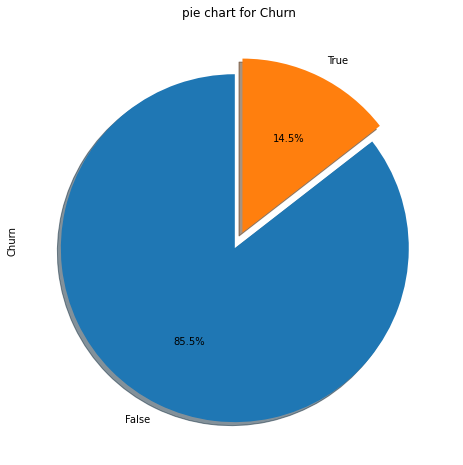

In [ ]:
# To draw the pie chart
telecom_df['Churn'].value_counts().plot.pie(explode=[.05,.05], autopct= '%1.1f%%', startangle=90, shadow= True, figsize=(8,8))
plt.title('pie chart for Churn')
plt.show()


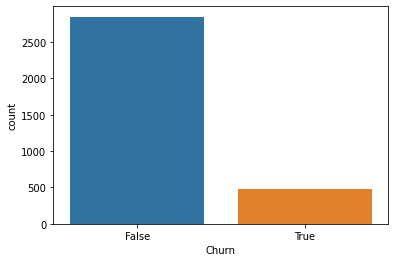

In [ ]:
# Drawing countplot
sns.countplot(x=telecom_df.Churn)

After analyzing the churn column, we can say that almost 15% of customers have churned.
let us take another feature in co relation with the churn to describe more.

# Analyzing state column

In [ ]:
# Print the unique value of state column
telecom_df['State'].nunique()

51

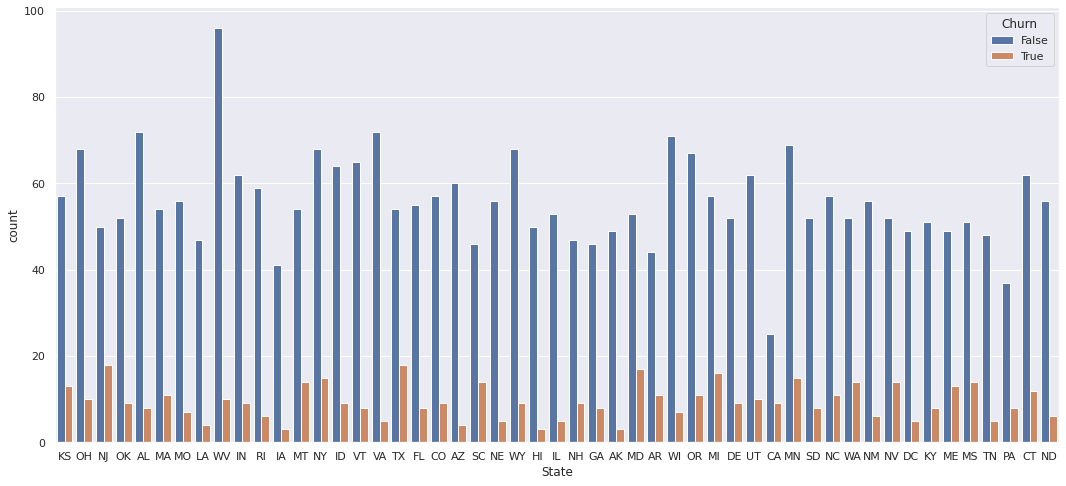

In [ ]:
# Comparing churn with state using countplot
sns.set(style= 'darkgrid')
plt.figure(figsize=(18,8))
ax=sns.countplot(x='State', hue='Churn',data=telecom_df)
plt.show()

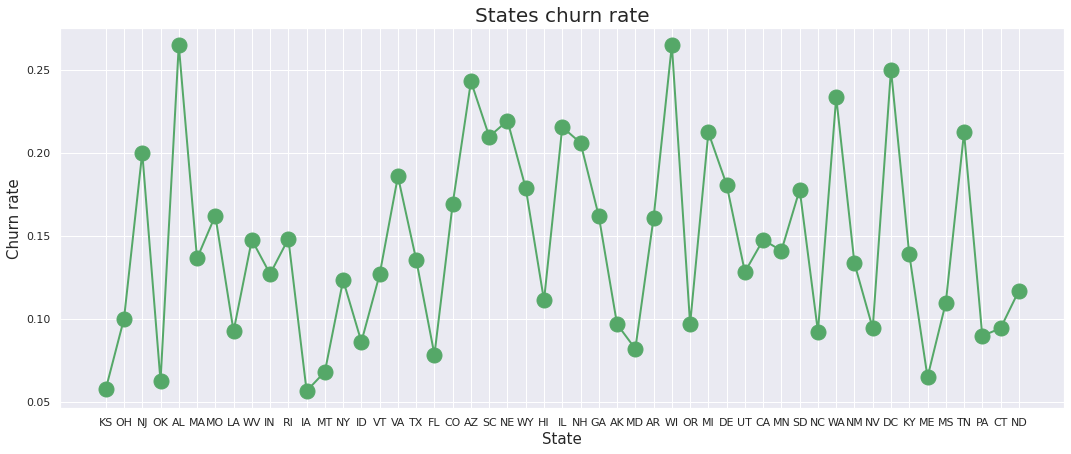

In [ ]:
s1 = telecom_df['State'].unique()
s2 = telecom_df.groupby(['State'])['Churn'].mean()
plt.rcParams['figure.figsize']=(18,7)
plt.plot(s1,s2,color='g',marker='o',linewidth=2,markersize=15)
plt.title('States churn rate',fontsize=20)
plt.xlabel('State', fontsize=15)
plt.ylabel('Churn rate',fontsize=15)
plt.show()

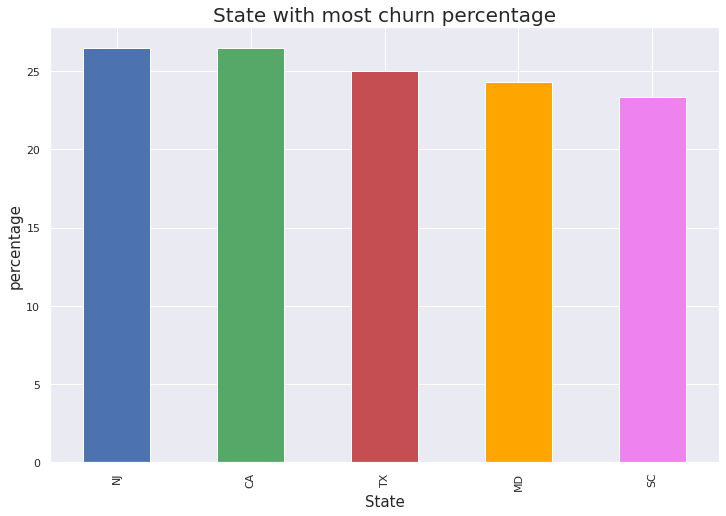

In [ ]:
plt.rcParams['figure.figsize']=(12,8)
color=plt.cm.copper(np.linspace(0,0.5,20))
((telecom_df.groupby(['State'])['Churn'].mean())*100).sort_values(ascending=False).head(5).plot.bar(color=['b','g','r','orange','violet','indigo'])
plt.title('State with most churn percentage',fontsize=20)
plt.xlabel('State', fontsize=15)
plt.ylabel('percentage',fontsize=15)
plt.show()

In [ ]:
# Calculate state with churn percentage
State_churn = pd.crosstab(telecom_df['State'],telecom_df['Churn'])
State_churn['Percentage churn'] = State_churn.apply(lambda x:x[1]*100/(x[0]+x[1]),axis=1)
print(State_churn)

Churn  False  True  Percentage churn
State                               
AK        49     3          5.769231
AL        72     8         10.000000
AR        44    11         20.000000
AZ        60     4          6.250000
CA        25     9         26.470588
CO        57     9         13.636364
CT        62    12         16.216216
DC        49     5          9.259259
DE        52     9         14.754098
FL        55     8         12.698413
GA        46     8         14.814815
HI        50     3          5.660377
IA        41     3          6.818182
ID        64     9         12.328767
IL        53     5          8.620690
IN        62     9         12.676056
KS        57    13         18.571429
KY        51     8         13.559322
LA        47     4          7.843137
MA        54    11         16.923077
MD        53    17         24.285714
ME        49    13         20.967742
MI        57    16         21.917808
MN        69    15         17.857143
MO        56     7         11.111111
M

There are 51 states with different churn rate

In [ ]:
# 10 topmostchurn state of the above list
telecom_df.groupby(['State'])['Churn'].mean().sort_values(ascending=False).head(10)

State
NJ    0.264706
CA    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
Name: Churn, dtype: float64

# Analyzing area code column

In [ ]:
# calculate area code vs churn percentage
area_code_churn = pd.crosstab(telecom_df['Area code'],telecom_df['Churn'])
area_code_churn['percentage churn'] = area_code_churn.apply(lambda x:x[1]*100/(x[0]+x[1]),axis=1)
print(area_code_churn)

Churn      False  True  percentage churn
Area code                               
408          716   122         14.558473
415         1419   236         14.259819
510          715   125         14.880952


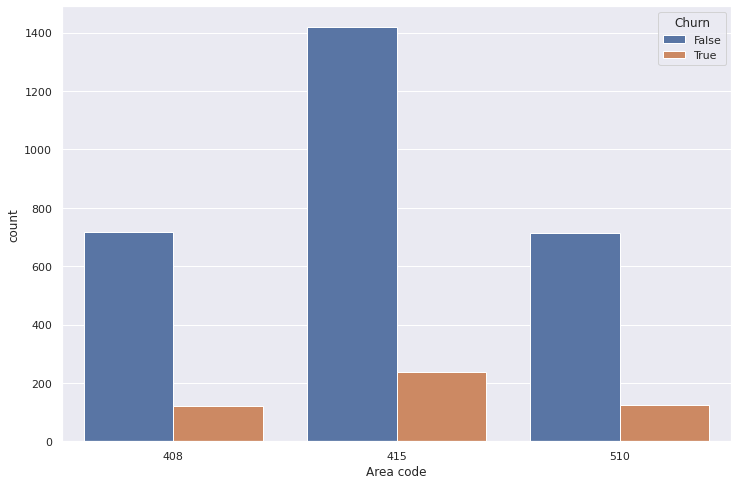

In [ ]:
sns.set(style='darkgrid')
ax= sns.countplot(x='Area code', hue= 'Churn',data= telecom_df)
plt.show()

From the above data, we notice that there is only 3 unique values of area code are available and the churn rate of these areas are almost same.
We can not relate area code and rate of churn by these area codes.
There may be other reason of the rate of churn being high in these areas. 

# Analyzing account length column

In [ ]:
# separating churn and non churn customers
churn_df = telecom_df[ telecom_df['Churn'] == bool(True)]
non_churn_df =  telecom_df[ telecom_df['Churn'] == bool(False)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


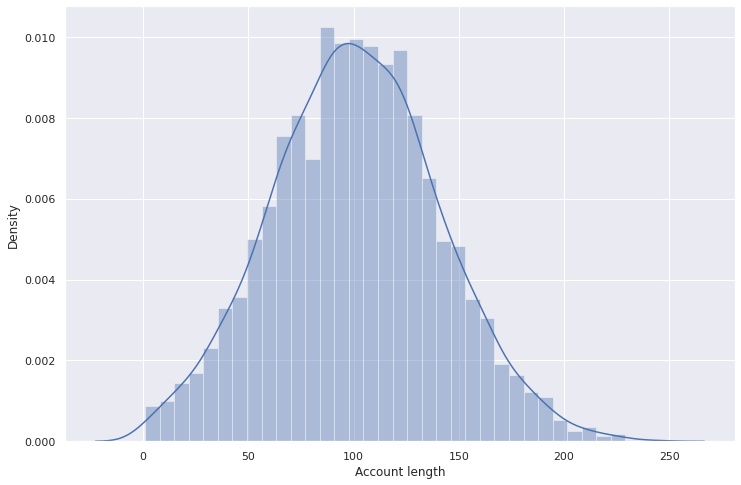

In [ ]:
# account length vs churn
sns.distplot( telecom_df['Account length'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level f

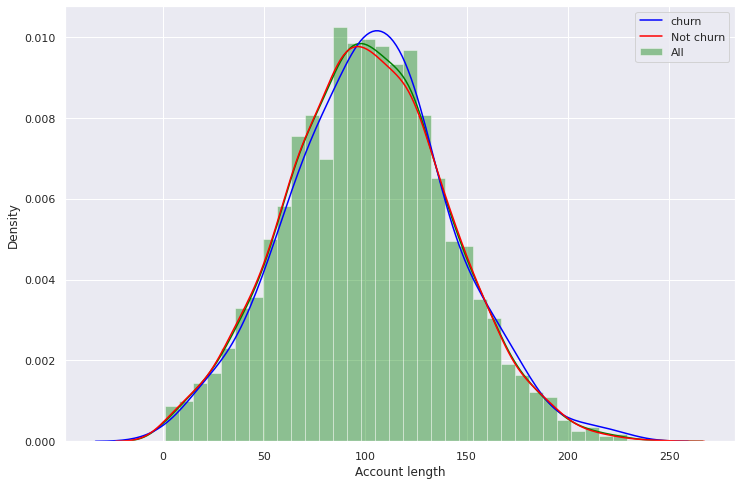

In [ ]:
# comparision of churn account length vs not churn account length
sns.distplot(telecom_df['Account length'],color='green', label='All')
sns.distplot(churn_df['Account length'], color='blue',hist=False, label='churn')
sns.distplot(non_churn_df['Account length'], color='red',hist=False, label='Not churn')
plt.legend()


After analyzing various aspects of the account lenth column, we didnot found any useful relation to churn.only slight difference is observed between the account length 100-130.
So we are not able to build any connection to the churn from this data.

# Analyzing international plan column

In [ ]:
# show count value of yes or no
telecom_df['International plan'].value_counts()


No     3010
Yes     323
Name: International plan, dtype: int64

In [ ]:
# show the unique data of international plan
telecom_df['International plan'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# calculate the international plan vs churn percentage
international_plan_churn = pd.crosstab(telecom_df['International plan'],telecom_df['Churn'])
international_plan_churn['percentage churn']=international_plan_churn.apply(lambda x:x[1]*100/(x[0]+x[1]),axis=1)
print(international_plan_churn)


Churn               False  True  percentage churn
International plan                               
No                   2664   346         11.495017
Yes                   186   137         42.414861


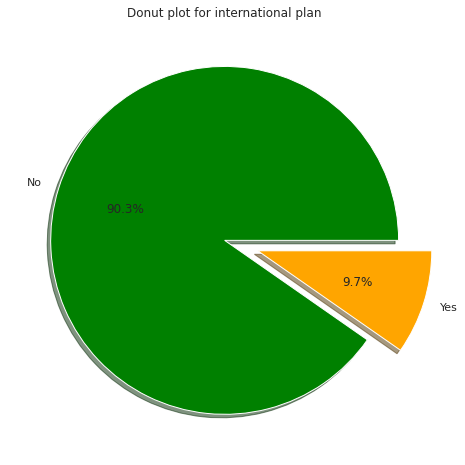

In [ ]:
# donut plot to analyze international plan
data= telecom_df['International plan'].value_counts()
explode = (0,0.2)
plt.pie(data, explode=explode, autopct='%1.1f%%', shadow= True, radius=1.0, labels=['No','Yes'],colors=['green','orange'])
p=plt.gcf()
plt.title('Donut plot for international plan')
plt.show()

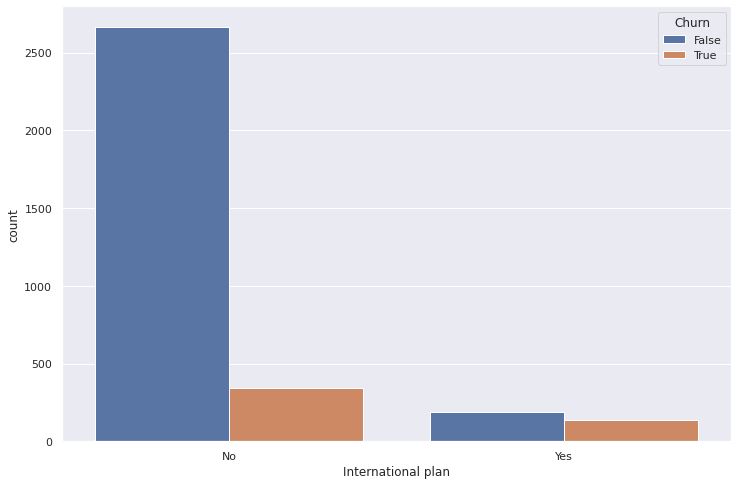

In [ ]:
# Analyzing using countplot
sns.countplot(x='International plan',hue= 'Churn',data=telecom_df)

From the above data, we can say that there are 3010 customers who donot have international plan.
There are 323 customers who have international plan. Amomg those customers who have international plan  42.4% customers churn.
Among those who donot have international plan only 11.4% customer churn.
So basically the people who bought international plan are churning in big numbers probably because of connectivity issues or high call charges.
 

# Analyzing voice mail plan column

In [ ]:
# finding the unique voice mail
telecom_df['Voice mail plan'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
# Calculate the voice mail plan vs churn percentage
voice_mail_plan_churn= pd.crosstab(telecom_df['Voice mail plan'],telecom_df['Churn'])
voice_mail_plan_churn['percentage churn']=voice_mail_plan_churn.apply(lambda x:x[1]*100/(x[0]+x[1]),axis=1)
print(voice_mail_plan_churn)

Churn            False  True  percentage churn
Voice mail plan                               
No                2008   403         16.715056
Yes                842    80          8.676790


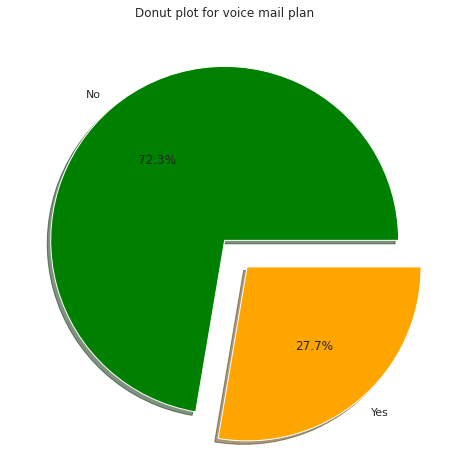

In [ ]:
# Donut plot to analyze voice mail plan
data= telecom_df['Voice mail plan'].value_counts()
explode = (0,0.2)
plt.pie(data, explode=explode, autopct='%1.1f%%', shadow= True, radius=1.0, labels=['No','Yes'],colors=['green','orange'])
p=plt.gcf()
plt.title('Donut plot for voice mail plan')
plt.show()


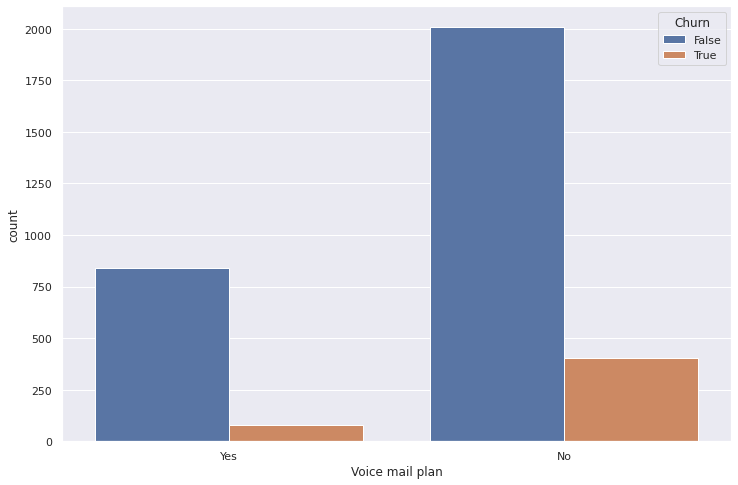

In [ ]:
# Analyzing using countplot
sns.countplot(x='Voice mail plan', hue= 'Churn', data= telecom_df)

Here no any clear indication of voice mail plan to the churn.So, we can not reach to any conclusion through this data.

# Analyzing of number of voice mail messags

In [ ]:
# finding the Number vmail messages
telecom_df['Number vmail messages'].unique()



array([25, 26,  0, 24, 37, 27, 33, 39, 30, 41, 28, 34, 46, 29, 35, 21, 32,
       42, 36, 22, 23, 43, 31, 38, 40, 48, 18, 17, 45, 16, 20, 14, 19, 51,
       15, 11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  9])

In [ ]:
# count the Number vmail messages
telecom_df['Number vmail messages'].value_counts

<bound method IndexOpsMixin.value_counts of 0       25
1       26
2        0
3        0
4        0
        ..
3328    36
3329     0
3330     0
3331     0
3332    25
Name: Number vmail messages, Length: 3333, dtype: int64>

In [ ]:
# Details of Number vmail messages
telecom_df['Number vmail messages'].describe()

count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: Number vmail messages, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


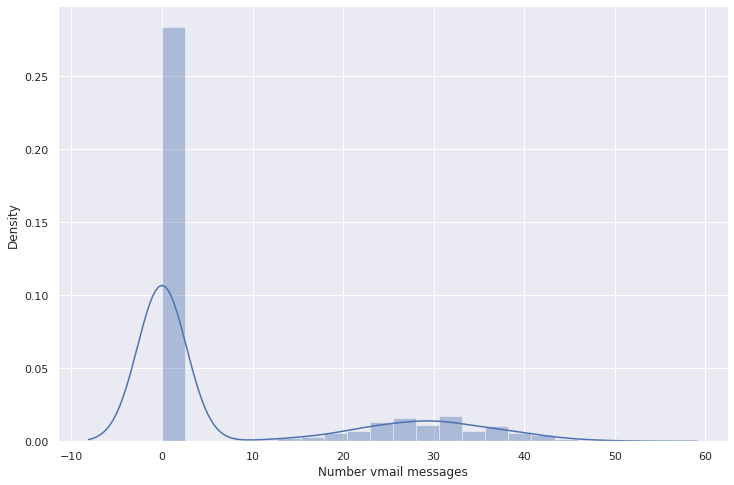

In [ ]:
# Analyzing using distplot
sns.distplot(telecom_df['Number vmail messages'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 720x576 with 0 Axes>

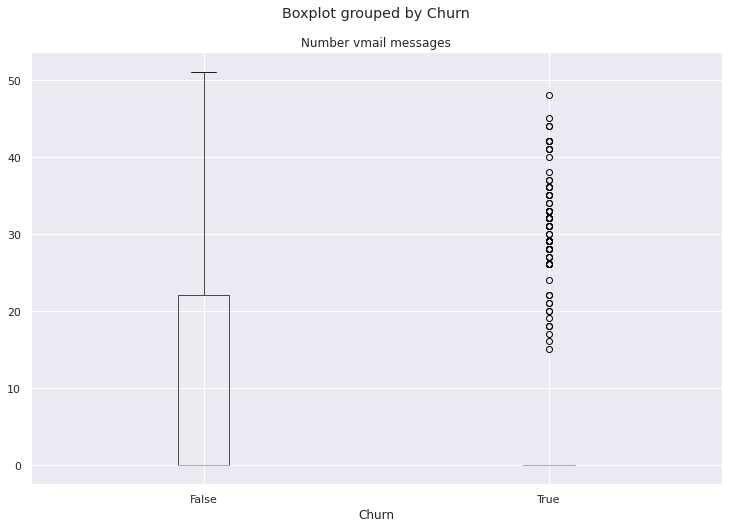

In [ ]:
# Boxplot of number vmail messages vs churn
fig = plt.figure(figsize=(10,8))
telecom_df.boxplot(column='Number vmail messages',by='Churn')
plt.show()

From the number of vmail messages data, we can get the information that after 20 vmail messages there is a churn in messages.
the vmail messages between 20-40 is the range of message churn.
So the company need to pay attention here and to improve messages quality.

# Analyzing customer service calls column

In [ ]:
# counting the customer service calls
telecom_df['Customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

In [ ]:
# calculating the customer service calls vs churn percentage
customer_service_calls_churn = pd.crosstab(telecom_df['Customer service calls'],telecom_df['Churn'])
customer_service_calls_churn['Percentage churn']= customer_service_calls_churn.apply(lambda x:x[1]*100/(x[0]+x[1]),axis=1)
print(customer_service_calls_churn)

Churn                   False  True  Percentage churn
Customer service calls                               
0                         605    92         13.199426
1                        1059   122         10.330229
2                         672    87         11.462451
3                         385    44         10.256410
4                          90    76         45.783133
5                          26    40         60.606061
6                           8    14         63.636364
7                           4     5         55.555556
8                           1     1         50.000000
9                           0     2        100.000000


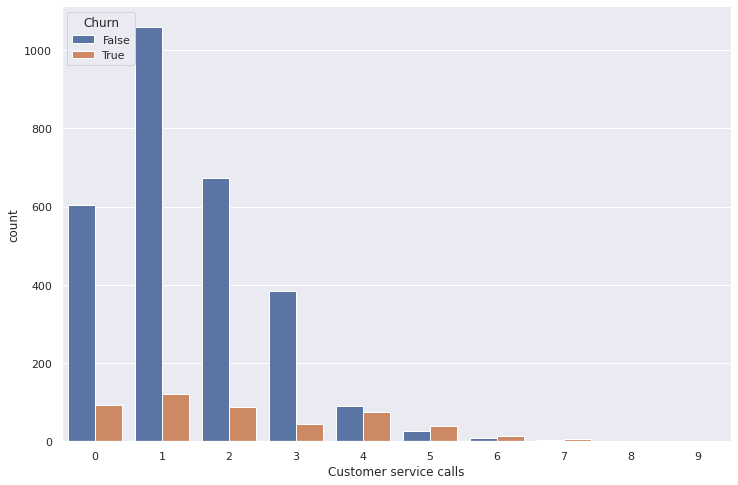

In [ ]:
# Analyzing using countplot
sns.countplot(x='Customer service calls', hue='Churn',data= telecom_df)

The above data indicates that after 3 customer service calls, there is huge percentage of churn i.e 45% and above.
In the first call to customer service there is 13% of churn. that means customer are not happy with the first call. 
customer care service is very bad that is also a reason of customer churn and customers change their operator.

#  SUMMARY OF CONCLUSION



After analyzing the exploratory data analysis of telecom company, we can conclude that-

*   The rate of churning of customers is almost 15%.

*   Some states like NJ,CA,TX,MD,SC have high rate of churn where as some states like IA,HI,AK have less churn rate.

*   Area code and account length do not play any vital role in finding the churning rate.
*   The customers who have international plan has churning rate of almost 42% that is either due to high price or lower price offered by other service providers.


*   Customer service calls data shows that there are many unsatisfied customers and those customers who calls customer care has more churning rate.


*   After 20 voice mail messages deliverd by a customer, problems in messages starts that shows that quality of voice mail messages is not good.



